<a href="https://colab.research.google.com/github/chaehyun1/Ybigta_assignment/blob/main/ybigta_0105_%ED%97%88%EA%B9%85%ED%8E%98%EC%9D%B4%EC%8A%A4_%EA%B3%BC%EC%A0%9C_%EA%B9%80%EC%B1%84%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CV model 1
- Yolos tiny
- https://huggingface.co/hustvl/yolos-tiny

In [ ]:
from transformers import YolosImageProcessor, YolosForObjectDetection
from PIL import Image
import torch
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


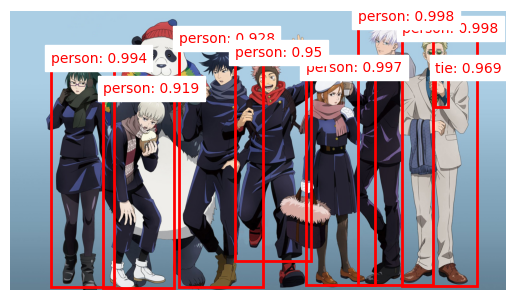

Number of detected objects: 8
Average confidence score: 0.969


In [ ]:
url = "/content/drive/MyDrive/img.jpg"
image = Image.open(url)

model = YolosForObjectDetection.from_pretrained('hustvl/yolos-tiny')
image_processor = YolosImageProcessor.from_pretrained("hustvl/yolos-tiny")

inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)

logits = outputs.logits
bboxes = outputs.pred_boxes


# Visualize the bounding boxes on the image
fig, ax = plt.subplots(1)
ax.imshow(image)

# Display detected objects and their bounding boxes
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]

    # Create a Rectangle patch
    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=2, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    # Display label and confidence score
    label_str = f"{model.config.id2label[label.item()]}: {round(score.item(), 3)}"
    plt.text(box[0], box[1], label_str, color='r', backgroundcolor='w')

plt.axis('off')
# Save the result to Google Drive
result_image_path = "/content/drive/MyDrive/your_result_image.jpg"  # Replace with your desired path in Google Drive
plt.savefig(result_image_path)

# Display the result
plt.show()

# Print performance metrics
print("Number of detected objects:", len(results["scores"]))
print("Average confidence score:", round(torch.mean(results["scores"]).item(), 3))
# Add any other metrics you want to display

## CV model 2
- resnet50
- https://huggingface.co/facebook/detr-resnet-50

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/401 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

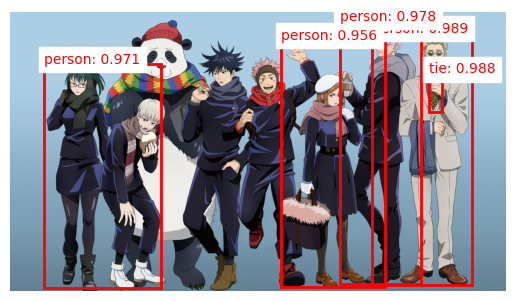

Number of detected objects: 5
Average confidence score: 0.976


In [ ]:
from transformers import DetrImageProcessor, DetrForObjectDetection

url = "/content/drive/MyDrive/img.jpg"
image = Image.open(url)

# you can specify the revision tag if you don't want the timm dependency
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

# Visualize the bounding boxes on the image
fig, ax = plt.subplots(1)
ax.imshow(image)

# Display detected objects and their bounding boxes
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]

    # Create a Rectangle patch
    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=2, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    # Display label and confidence score
    label_str = f"{model.config.id2label[label.item()]}: {round(score.item(), 3)}"
    plt.text(box[0], box[1], label_str, color='r', backgroundcolor='w')

# Remove axis labels and ticks
plt.axis('off')

# Save the result to Google Drive
result_image_path = "/content/drive/MyDrive/detr_result_image.jpg"  # Replace with your desired path in Google Drive
plt.savefig(result_image_path, bbox_inches='tight', pad_inches=0)

# Display the result
plt.show()

# Print performance metrics
print("Number of detected objects:", len(results["scores"]))
print("Average confidence score:", round(torch.mean(results["scores"]).item(), 3))
# Add any other metrics you want to display

- 전자의 경우 감지된 객체의 수가 더 많다. 물론 객체를 더 많이 감지해서 무조건 좋다라고 판단할 수는 없지만, 객체를 올바르게 감지한 것을 결과를 통해서 확인할 수 있다.
- 후자의 경우 Average confidence score가 살짝 더 높은 것을 알 수 있다.
- 어떤 모델이 더 좋은지 뚜렷하게 판단하기는 힘들지만, 전자의 Average confidence score 또한 매우 높기 때문에, yolo 모델이 객체를 더 많이, 그리고 정확히 감지하였다고 판단하였다.
- 이외에도 cv model의 성능을 예측하는 metric은 여러가지 존재하는데, 위의 지표로만 판단하였다.

## NLP 모델 FINE-TUNING
- https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment
- https://nkw011.github.io/nlp/tutorial4_Fine-tune_a_pretrained_model/

- data 전처리

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.2 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
nsmc = load_dataset('nsmc') # 한국어 사용을 위해 네이버 영화 리뷰 데이터 사용
nsmc

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public

Generating train split:   0%|          | 0/150000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'document', 'label'],
        num_rows: 150000
    })
    test: Dataset({
        features: ['id', 'document', 'label'],
        num_rows: 50000
    })
})

In [ ]:
# 전체 데이터를 학습하려면 오래 걸리기 때문에 학습 데이터 2000개, 테스트 데이터 2000개를 random sampling
train_data = nsmc['train'].shuffle(seed=42).select(range(2000))
test_data = nsmc['test'].shuffle(seed=42).select(range(2000))

In [ ]:
MODEL_NAME = 'bert-base-multilingual-cased'
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# 분류를 위한 model과 tokenizer를 load
# 문장이 어떤 감정에 해당하는 지 분류하는 것이기 때문에 Sequence Classification을 위한 AutoClass인 AutoModelForSequenceClassification을 사용
# model과 tokenizer로 ‘bert-base-multilingual-cased’을 사용
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

In [ ]:
# data의 document를 모두 encoding
train_encoding = tokenizer(
    train_data['document'],
    return_tensors='pt',
    padding=True,
    truncation=True
)

test_encoding = tokenizer(
    test_data['document'],
    return_tensors='pt',
    padding=True,
    truncation=True
)

In [ ]:
# 학습을 위한 데이터셋 구성
# Dataset 클래스를 이용해 학습과 검증을 위한 데이터셋을 만든다.
from torch.utils.data import Dataset

class NSMCDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encoding = encodings
        self.labels = labels

    def __getitem__(self, idx):
        data = {key: val[idx] for key, val in self.encoding.items()}
        data['labels'] = torch.tensor(self.labels[idx]).long()

        return data

    def __len__(self):
        return len(self.labels)

In [ ]:
train_set = NSMCDataset(train_encoding, train_data['label'])
test_set = NSMCDataset(test_encoding, test_data['label'])

In [ ]:
train_set[0]

{'input_ids': tensor([  101, 11399, 12225,   119,  9788,  9435, 10739, 71439, 11467,  9485,
         38709, 70146,  9788,  9435, 10739, 71439, 11467,  8977, 33305, 11903,
           119,   102,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0]),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0,

- pytorch 방식으로 학습

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_set, batch_size=32)
test_loader = DataLoader(test_set, batch_size=32)

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
dummy = tokenizer(train_data['document'][0], return_tensors='pt') # dummy 데이터를 이용해 model의 output이 어떻게 나오는 지 확인
model(**dummy) # train 함수를 구성하려면 model의 output이 어떻게 구성되었는지 확인

SequenceClassifierOutput(loss=None, logits=tensor([[-0.1465, -0.1191]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
from tqdm.notebook import tqdm
from datasets import load_metric

def train(epoch, model, dataloader, optimizer, device):
    model.to(device)

    m1 = load_metric('accuracy')
    m2 = load_metric('f1')

    for e in range(1, epoch+1):
        total_loss = 0.
        preds = []
        labels = []
        progress_bar = tqdm(dataloader, desc=f'TRAIN - EPOCH {e} |')
        for data in progress_bar:
            data = {k:v.to(device) for k, v in data.items()}
            output = model(**data)
            current_loss = output.loss

            total_loss += current_loss
            preds += list(output.logits.argmax(-1))
            labels += list(data['labels'].detach().cpu().numpy())

            optimizer.zero_grad()
            current_loss.backward()
            optimizer.step()

            progress_bar.set_description(f'TRAIN - EPOCH {e} | current-loss: {current_loss:.4f}')

        acc = m1.compute(predictions=preds, references=labels)['accuracy']
        f1 = m2.compute(predictions=preds, references=labels)['f1']
        avg = total_loss / len(dataloader)

        print('='*64)
        print(f"TRAIN - EPOCH {e} | LOSS: {avg:.4f} ACC: {acc:.4f} F1: {f1:.4f}")
        print('='*64)

In [ ]:
def evaluate(model, dataloader, device):
    model.to(device)

    m1 = load_metric('accuracy')
    m2 = load_metric('f1')

    total_loss = 0.
    preds = []
    labels = []
    progress_bar = tqdm(dataloader, desc=f'EVAL |')
    for data in progress_bar:
        data = {k:v.to(device) for k, v in data.items()}

        with torch.no_grad():
            output = model(**data)

        current_loss = output.loss

        total_loss += current_loss
        preds += list(output.logits.argmax(-1))
        labels += list(data['labels'].detach().cpu().numpy())

        progress_bar.set_description(f'EVAL | current-loss: {current_loss:.4f}')

    acc = m1.compute(predictions=preds, references=labels)['accuracy']
    f1 = m2.compute(predictions=preds, references=labels)['f1']
    avg = total_loss / len(dataloader)

    print('='*64)
    print(f"EVAL | LOSS: {avg:.4f} ACC: {acc:.4f} F1: {f1:.4f}")
    print('='*64)

In [ ]:
from torch.optim import AdamW

# model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)
optimizer = AdamW(model.parameters(), lr=5e-5)

In [ ]:
train(10, model, train_loader, optimizer, device) # 학습 진행

<ipython-input-12-4a403b02629b>:7: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  m1 = load_metric('accuracy')
/usr/local/lib/python3.10/dist-packages/datasets/load.py:752: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/datasets/load.py:752: FutureWarning: The repository for f1 contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/f1/f1.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


TRAIN - EPOCH 1 |:   0%|          | 0/63 [00:00<?, ?it/s]

TRAIN - EPOCH 1 | LOSS: 0.6785 ACC: 0.5650 F1: 0.5074


TRAIN - EPOCH 2 |:   0%|          | 0/63 [00:00<?, ?it/s]

TRAIN - EPOCH 2 | LOSS: 0.5637 ACC: 0.7170 F1: 0.7133


TRAIN - EPOCH 3 |:   0%|          | 0/63 [00:00<?, ?it/s]

TRAIN - EPOCH 3 | LOSS: 0.4188 ACC: 0.8250 F1: 0.8211


TRAIN - EPOCH 4 |:   0%|          | 0/63 [00:00<?, ?it/s]

TRAIN - EPOCH 4 | LOSS: 0.3912 ACC: 0.8320 F1: 0.8259


TRAIN - EPOCH 5 |:   0%|          | 0/63 [00:00<?, ?it/s]

TRAIN - EPOCH 5 | LOSS: 0.2617 ACC: 0.8965 F1: 0.8931


TRAIN - EPOCH 6 |:   0%|          | 0/63 [00:00<?, ?it/s]

TRAIN - EPOCH 6 | LOSS: 0.1301 ACC: 0.9565 F1: 0.9561


TRAIN - EPOCH 7 |:   0%|          | 0/63 [00:00<?, ?it/s]

TRAIN - EPOCH 7 | LOSS: 0.1013 ACC: 0.9630 F1: 0.9627


TRAIN - EPOCH 8 |:   0%|          | 0/63 [00:00<?, ?it/s]

TRAIN - EPOCH 8 | LOSS: 0.0775 ACC: 0.9730 F1: 0.9726


TRAIN - EPOCH 9 |:   0%|          | 0/63 [00:00<?, ?it/s]

TRAIN - EPOCH 9 | LOSS: 0.0457 ACC: 0.9820 F1: 0.9818


TRAIN - EPOCH 10 |:   0%|          | 0/63 [00:00<?, ?it/s]

TRAIN - EPOCH 10 | LOSS: 0.0398 ACC: 0.9860 F1: 0.9859


In [ ]:
evaluate(model, test_loader, device)

/usr/local/lib/python3.10/dist-packages/datasets/load.py:752: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:752: FutureWarning: The repository for f1 contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/f1/f1.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next majo

EVAL |:   0%|          | 0/63 [00:00<?, ?it/s]

EVAL | LOSS: 1.3427 ACC: 0.7270 F1: 0.7609


In [ ]:
# 새로운 문장에 대한 예측
def predict_sentiment_with_progress(model, tokenizer, sentences, device, batch_size=8):
    model = model.to(device)

    dataloader = DataLoader(sentences, batch_size=batch_size, shuffle=False)

    progress_bar = tqdm(dataloader, desc='Predicting Sentiment')

    # Lists to store predictions
    all_probabilities = []

    model.eval()

    for batch in progress_bar:
        inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=128)
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = model(**inputs)

        # Get predicted probabilities
        logits = outputs.logits #예측값
        probabilities = torch.nn.functional.softmax(logits, dim=1)

        all_probabilities.extend(probabilities.cpu().numpy()) # 예측값 저장

    return all_probabilities


new_sentences = ["실제 역사를 거의 그대로 다루다보니 보면서 화가 나긴 하지만 영화적으로 흥미롭게 구성을 잘 해서 몰입도가 높아요. 몇 번을 봐도 볼 때마다 새롭게 보이는 면이 있구요. 의미와 재미를 다 잡은 작품이에요!"]
probabilities = predict_sentiment_with_progress(model, tokenizer, new_sentences, device)
print(f"Probabilities: {probabilities}")

Predicting Sentiment: 100%|██████████| 1/1 [00:00<00:00, 19.00it/s]

Probabilities: [array([0.00272623, 0.99727374], dtype=float32)]


In [ ]:
for i, sentence_probabilities in enumerate(probabilities):
    predicted_class = torch.argmax(torch.tensor(sentence_probabilities)).item()
    predicted_probability = sentence_probabilities[predicted_class].item()

    if predicted_class == 1:
        print(f"Sentence {i + 1}: Predicted sentiment: Positive (Probability: {predicted_probability:.4f})")
    else:
        print(f"Sentence {i + 1}: Predicted sentiment: Negative (Probability: {predicted_probability:.4f})")

Sentence 1: Predicted sentiment: Positive (Probability: 0.9973)
